# Project 1: Wildlife Conservation in Cote d'Ivoire

## Part I: Image Vs. Tensor
**Objectives:**
- move images based on the labels
- check the number of images in each folder
- identify the mode and size of the images
- convert the images from PIL to tensors
- do analysis on the tensors, such as mean, max and min values for each channel

## Getting ready

In [1]:
import os
import sys

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import PIL
import torch
import torchvision
from PIL import Image
from torchvision import transforms

Check version of the libraries

In [2]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("matplotlib version:", matplotlib.__version__)
print("pandas version:", pd.__version__)
print("PIL version:", PIL.__version__)
print("torch version:", torch.__version__)
print("torchvision version:", torchvision.__version__)

Platform: win32
Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
---
matplotlib version: 3.8.4
pandas version: 2.2.2
PIL version: 10.4.0
torch version: 2.5.1
torchvision version: 0.20.1


## Import Data

In [3]:
df = pd.read_csv('../data/animal images/train_labels.csv')
df.head()

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
df['target'] = 'animal'
df.head()

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent,target
0,ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,animal
1,ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,animal
2,ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,animal
3,ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,animal
4,ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,animal


In [5]:
for name in df.columns:
    df.loc[df[name] == 1, 'target'] = name
df.head()

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent,target
0,ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bird
1,ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,monkey_prosimian
2,ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bird
3,ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,monkey_prosimian
4,ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,leopard


<Axes: title={'center': 'Target distribution'}, xlabel='target'>

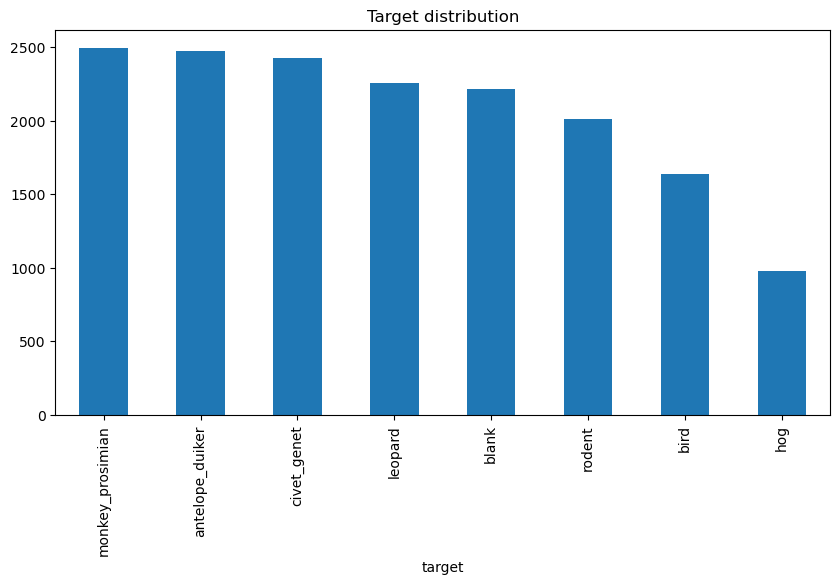

In [6]:
df['target'].value_counts().plot(kind= 'bar', figsize=(10, 5), title='Target distribution')

In [7]:
df.head()

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent,target
0,ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bird
1,ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,monkey_prosimian
2,ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bird
3,ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,monkey_prosimian
4,ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,leopard


In [8]:
df2 = pd.read_csv('../data/animal images/train_features.csv')
df2.head()

,id,filepath,site
0,ZJ000000,train_features/ZJ000000.jpg,S0120
1,ZJ000001,train_features/ZJ000001.jpg,S0069
2,ZJ000002,train_features/ZJ000002.jpg,S0009
3,ZJ000003,train_features/ZJ000003.jpg,S0008
4,ZJ000004,train_features/ZJ000004.jpg,S0036


In [9]:
for name in df.columns:
    os.makedirs(f'../data/animal images/train_images/{name}', exist_ok=True)

### Move images to appropriate directories


```import shutil

# Define source and destination directories
source_dir = '../data/animal images/train_features'
destination_dir = '../data/animal images/train_images/'

# Iterate over each row in the dataframe
for index, row in df2.iterrows():
    img_id = row['id']
    img_file = row['filepath'].split('/')[-1]
    
    target_folder = df.loc[df['id'] == img_id, 'target'].values[0]
    
    # Create the target directory if it doesn't exist
    target_dir = os.path.join(destination_dir, target_folder)
    os.makedirs(target_dir, exist_ok=True)
    
    # Move the image file
    shutil.move(os.path.join(source_dir, img_file), os.path.join(target_dir, img_file))
```


In [10]:
df.loc[df['id'] == 'ZJ000207', 'target']

207    antelope_duiker
Name: target, dtype: object

In [11]:
for name in df['target'].sort_values().unique():
    print(f'Number of images in {name}:', len(os.listdir(f'../data/animal images/train_images/multiclass/{name}')))

Number of images in antelope_duiker: 2474
Number of images in bird: 1641
Number of images in blank: 2213
Number of images in civet_genet: 2423
Number of images in hog: 978
Number of images in leopard: 2254
Number of images in monkey_prosimian: 2492
Number of images in rodent: 2013


In [12]:
df['target'].value_counts().sort_index()

target
antelope_duiker     2474
bird                1641
blank               2213
civet_genet         2423
hog                  978
leopard             2254
monkey_prosimian    2492
rodent              2013
Name: count, dtype: int64

### Check mode of the images, either grayscale or RGB

In [13]:
mode_list = []
for image in os.listdir('../data/animal images/train_images/multiclass/bird/'):
    mode_list.append(Image.open(f'../data/animal images/train_images/multiclass/bird/{image}').mode)
set(mode_list)

{'L', 'RGB'}

Hence these images should be converted to the same mode, in our case to grayscale.

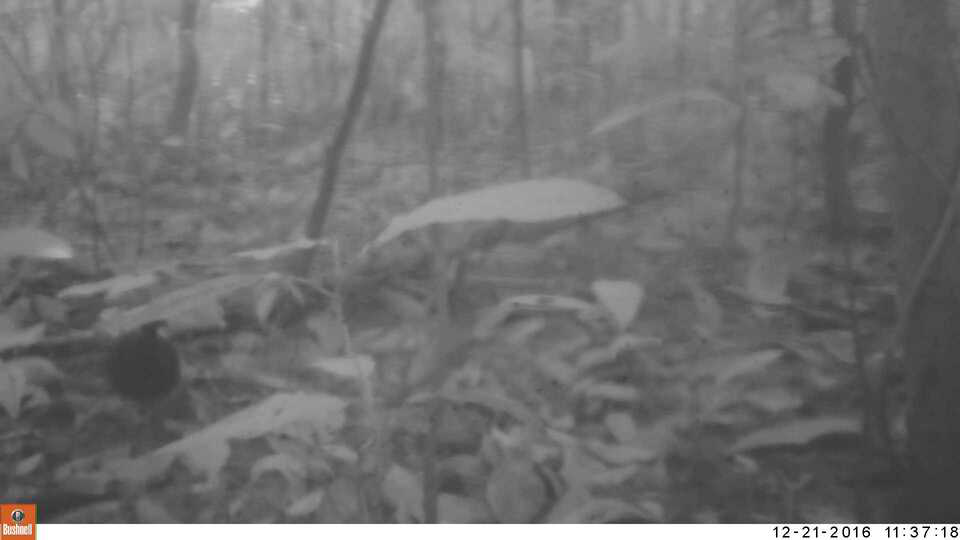

In [14]:
bird_image = Image.open('../data/animal images/train_images/multiclass/bird/ZJ000000.jpg')
bird_image

In [15]:
print('Bird image size:', bird_image.size)
print('Bird image mode:', bird_image.mode)

Bird image size: (960, 540)
Bird image mode: RGB


### Load Tensors

In [16]:
bird_tensor = transforms.ToTensor()(bird_image)

In [17]:
print('Bird tensor type:', bird_tensor.type)
print('Bird tensor shape:', bird_tensor.shape)
print('Bird tensor dtype:', bird_tensor.dtype)
print('Bird tensor device:', bird_tensor.device)

Bird tensor type: <built-in method type of Tensor object at 0x000002878FE2C1E0>
Bird tensor shape: torch.Size([3, 540, 960])
Bird tensor dtype: torch.float32
Bird tensor device: cpu


(-0.5, 959.5, 539.5, -0.5)

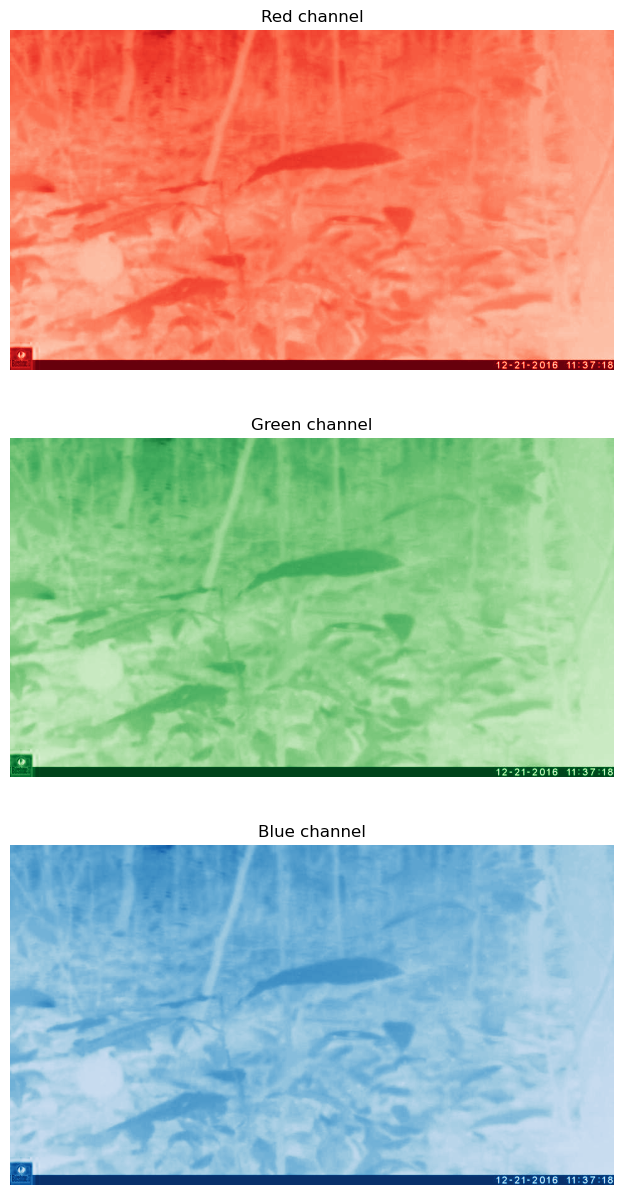

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize= (10, 15))
ax1.imshow(bird_tensor[0, :, :], cmap= 'Reds')
ax1.set_title('Red channel')
ax1.axis('off')
ax2.imshow(bird_tensor[0, :, :], cmap= 'Greens')
ax2.set_title('Green channel')
ax2.axis('off')
ax3.imshow(bird_tensor[0, :, :], cmap= 'Blues')
ax3.set_title('Blue channel')
ax3.axis('off')



The dimensions for an image tensor are always **(C x H x W)**, channel by height by width.

Now, what about the maximum and minimum values in the tensor?

In [19]:
max_channel_val = bird_tensor.amax(dim= 1)
print('max_channel_val shape:', max_channel_val.shape)
print('max_channel_val data type:', max_channel_val.dtype)
print('max_channel_val device:', max_channel_val.device)
print('Maximum values in each channel:')
max_channel_val

max_channel_val shape: torch.Size([3, 960])
max_channel_val data type: torch.float32
max_channel_val device: cpu
Maximum values in each channel:


tensor([[1.0000, 0.8706, 0.8353,  ..., 0.9765, 1.0000, 1.0000],
        [0.6667, 0.5647, 0.5647,  ..., 0.9765, 1.0000, 1.0000],
        [0.5765, 0.5647, 0.5647,  ..., 0.9765, 1.0000, 1.0000]])

In [20]:
min_channel_val = bird_tensor.amin(dim= 1)
print('min_channel_val shape:', min_channel_val.shape)
print('min_channel_val data type:', min_channel_val.dtype)
print('min_channel_val device:', min_channel_val.device)
print('Minimum values in each channel:')
min_channel_val

min_channel_val shape: torch.Size([3, 960])
min_channel_val data type: torch.float32
min_channel_val device: cpu
Minimum values in each channel:


tensor([[0.2549, 0.2549, 0.2549,  ..., 0.0157, 0.2078, 0.1843],
        [0.2157, 0.2549, 0.2549,  ..., 0.0157, 0.2078, 0.1843],
        [0.0275, 0.1098, 0.1176,  ..., 0.0157, 0.2078, 0.1843]])

In [21]:
mean_channel_val = bird_tensor.mean(dim= 1)
print('mean_channel_val shape:', mean_channel_val.shape)
print('mean_channel_val data type:', mean_channel_val.dtype)
print('mean_channel_val device:', mean_channel_val.device)
print('Mean values in each channel:')
mean_channel_val

mean_channel_val shape: torch.Size([3, 960])
mean_channel_val data type: torch.float32
mean_channel_val device: cpu
Mean values in each channel:


tensor([[0.4438, 0.4418, 0.4384,  ..., 0.3121, 0.3204, 0.3208],
        [0.4203, 0.4186, 0.4156,  ..., 0.3121, 0.3204, 0.3208],
        [0.4099, 0.4078, 0.4041,  ..., 0.3121, 0.3204, 0.3208]])

### Analysis of Channel Values

The maximum, minimum, and mean values for each channel (Red, Green, and Blue) of the bird image tensor have been calculated. Here are the results:

- **Maximum Channel Values**:
    - The maximum values in each channel indicate the brightest points in the image for the respective color channels.
    - The shape of the tensor is `(3, 540)`, representing the maximum values across the width of the image for each of the three channels.
    - The data type is `torch.float32`, and the values range from 0 to 1.

- **Minimum Channel Values**:
    - The minimum values in each channel indicate the darkest points in the image for the respective color channels.
    - The shape of the tensor is `(3, 540)`, representing the minimum values across the width of the image for each of the three channels.
    - The data type is `torch.float32`, and the values range from 0 to 1.

- **Mean Channel Values**:
    - The mean values in each channel provide an average intensity for the respective color channels across the width of the image.
    - The shape of the tensor is `(3, 540)`, representing the mean values across the width of the image for each of the three channels.
    - The data type is `torch.float32`, and the values range from 0 to 1.

These values help in understanding the distribution of pixel intensities in the image and can be useful for various image processing tasks, such as normalization and contrast adjustment.